# Time series Modeling

In [1]:
# IMPORTING PACKAGES 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
# Load data frames - will also load incasae to compare and contrast

skudata_interpolated = pd.read_csv('C:/Users/patri/OneDrive/Desktop/CAP-Backup/Patrick_Advincula_Capstone_05-13-23/2-CSV_Output_after_EDA/skudata_interpolated.csv')
skudata_interpolated.head()

,Promotion::Start Date Promo,Account Factors::Profit Center,Promo ID,Pricing::Segment,Pricing::Engine,Promotion::SKU,Promotion::End Date Promo,Pricing::Street,Promotion::Promo_Value,Promotion::Promo Type,...,Sell Through Estimate POS,Sell Through Estimate Inv,Final Quantity,Sell Through Estimate,SOP_Period,SOP_Half,SOP_Quarter,Usage ID,Account Factors::SAP Account,Promotion::LevelType
0,2014-12-01,1010,6894,zzz,123,TP1,12/31/2014,459.99,7.0,2,...,371.0,62.000000,62.0,160.0,209,H2,Q3,23747.0,2,2
1,2014-12-01,1010,6894,zzz,123,TP1,12/31/2014,459.99,7.0,2,...,276.0,182.333333,0.0,0.0,209,H2,Q3,23749.0,1,1
2,2015-01-01,1080,6895,zzz,123,TP1,1/31/2015,459.99,30.0,1,...,181.0,302.666667,0.0,0.0,210,H2,Q1,23750.0,3,3
3,2015-01-01,1010,6895,zzz,123,TP1,1/31/2015,459.99,30.0,1,...,86.0,423.000000,423.0,160.0,210,H2,Q1,23751.0,2,2
4,2015-01-01,1010,6895,zzz,123,TP1,1/31/2015,459.99,30.0,1,...,69.5,390.000000,0.0,0.0,210,H2,Q1,23752.0,1,1


In [3]:
skudata_interpolated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Promotion::Start Date Promo       1552 non-null   object 
 1   Account Factors::Profit Center    1552 non-null   int64  
 2   Promo ID                          1552 non-null   int64  
 3   Pricing::Segment                  1552 non-null   object 
 4   Pricing::Engine                   1552 non-null   int64  
 5   Promotion::SKU                    1552 non-null   object 
 6   Promotion::End Date Promo         1552 non-null   object 
 7   Pricing::Street                   1552 non-null   float64
 8   Promotion::Promo_Value            1552 non-null   float64
 9   Promotion::Promo Type             1552 non-null   int64  
 10  Promotion::Promo_Net Price Point  1552 non-null   float64
 11  Exp_Revenue Est                   1552 non-null   float64
 12  Exp_Bi

In [6]:
# Loading this to compare and contrast datasets.

no_zero = pd.read_csv('C:/Users/patri/OneDrive/Desktop/CAP-Backup/Patrick_Advincula_Capstone_05-13-23/2-CSV_Output_after_EDA/no_zero.csv')
no_zero.head()

,Promotion::Start Date Promo,Account Factors::Profit Center,Promo ID,Pricing::Segment,Pricing::Engine,Promotion::SKU,Promotion::End Date Promo,Pricing::Street,Promotion::Promo_Value,Promotion::Promo Type,...,Sell Through Estimate POS,Sell Through Estimate Inv,Final Quantity,Sell Through Estimate,SOP_Period,SOP_Half,SOP_Quarter,Usage ID,Account Factors::SAP Account,Promotion::LevelType
0,2014-12-01,1010,6894,zzz,123,TP1,12/31/2014,459.99,7.0,2,...,371.000000,62.0,62.0,160.0,209,H2,Q3,23747.0,2,2
1,2015-01-01,1010,6895,zzz,123,TP1,1/31/2015,459.99,30.0,1,...,86.000000,423.0,423.0,160.0,210,H2,Q1,23751.0,2,2
2,2015-01-01,1010,6896,zzz,123,TP1,1/31/2015,459.99,5.0,2,...,20.000000,291.0,20.0,80.0,210,H2,Q1,23755.0,2,2
3,2015-02-01,1010,6897,zzz,123,TP1,2/28/2015,459.99,30.0,2,...,170.000000,258.0,258.0,160.0,211,H2,Q4,23756.0,2,2
4,2015-03-01,1010,6898,zzz,123,TP1,3/31/2015,459.99,30.0,2,...,73.428571,137.0,137.0,121.0,212,H2,Q4,23760.0,2,2


In [7]:
no_zero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Promotion::Start Date Promo       716 non-null    object 
 1   Account Factors::Profit Center    716 non-null    int64  
 2   Promo ID                          716 non-null    int64  
 3   Pricing::Segment                  716 non-null    object 
 4   Pricing::Engine                   716 non-null    int64  
 5   Promotion::SKU                    716 non-null    object 
 6   Promotion::End Date Promo         716 non-null    object 
 7   Pricing::Street                   716 non-null    float64
 8   Promotion::Promo_Value            716 non-null    float64
 9   Promotion::Promo Type             716 non-null    int64  
 10  Promotion::Promo_Net Price Point  716 non-null    float64
 11  Exp_Revenue Est                   716 non-null    float64
 12  Exp_Bill

In [8]:
#Lets adjust our date dtype

skudata_interpolated['Promotion::Start Date Promo'] = pd.to_datetime(skudata_interpolated['Promotion::Start Date Promo'])

In [9]:
no_zero['Promotion::Start Date Promo'] = pd.to_datetime(no_zero['Promotion::Start Date Promo'])

In [10]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [12]:
#pip install pmdarima

In [13]:
from pmdarima import auto_arima

# Lets config the Date to index

In [14]:
# Set as Index

skudata_interpolated["Promotion::Start Date Promo"] = pd.to_datetime(skudata_interpolated["Promotion::Start Date Promo"])
skudata_interpolated = skudata_interpolated.set_index("Promotion::Start Date Promo")

skudata_interpolated.head()

,Account Factors::Profit Center,Promo ID,Pricing::Segment,Pricing::Engine,Promotion::SKU,Promotion::End Date Promo,Pricing::Street,Promotion::Promo_Value,Promotion::Promo Type,Promotion::Promo_Net Price Point,...,Sell Through Estimate POS,Sell Through Estimate Inv,Final Quantity,Sell Through Estimate,SOP_Period,SOP_Half,SOP_Quarter,Usage ID,Account Factors::SAP Account,Promotion::LevelType
Promotion::Start Date Promo,,,,,,,,,,,,,,,,,,,,,
2014-12-01,1010,6894,zzz,123,TP1,12/31/2014,459.99,7.0,2,452.99,...,371.0,62.000000,62.0,160.0,209,H2,Q3,23747.0,2,2
2014-12-01,1010,6894,zzz,123,TP1,12/31/2014,459.99,7.0,2,452.99,...,276.0,182.333333,0.0,0.0,209,H2,Q3,23749.0,1,1
2015-01-01,1080,6895,zzz,123,TP1,1/31/2015,459.99,30.0,1,429.99,...,181.0,302.666667,0.0,0.0,210,H2,Q1,23750.0,3,3
2015-01-01,1010,6895,zzz,123,TP1,1/31/2015,459.99,30.0,1,429.99,...,86.0,423.000000,423.0,160.0,210,H2,Q1,23751.0,2,2
2015-01-01,1010,6895,zzz,123,TP1,1/31/2015,459.99,30.0,1,429.99,...,69.5,390.000000,0.0,0.0,210,H2,Q1,23752.0,1,1


In [15]:
# the "MS" option specifies Monthly frequency by Start day this is done to aggrate data into monthly values
skudata_interpolatedMS = skudata_interpolated.resample("MS").sum()

skudata_interpolatedMS.head()

C:\Users\patri\AppData\Local\Temp\ipykernel_9952\1909837268.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  skudata_interpolatedMS = skudata_interpolated.resample("MS").sum()


,Account Factors::Profit Center,Promo ID,Pricing::Engine,Pricing::Street,Promotion::Promo_Value,Promotion::Promo Type,Promotion::Promo_Net Price Point,Exp_Revenue Est,Exp_Billing Profit,Exp_Billing Profit Supply,...,Account,Sell Through Estimate Adj,Sell Through Estimate POS,Sell Through Estimate Inv,Final Quantity,Sell Through Estimate,SOP_Period,Usage ID,Account Factors::SAP Account,Promotion::LevelType
Promotion::Start Date Promo,,,,,,,,,,,,,,,,,,,,,
2014-11-01,5120,36880,615,2299.95,150.0,10,2149.95,20363.206068,3729.680586,21971.930194,...,8,360.0,46.373626,1135.500000,232.00,360.0,1040,142065.0,8,8
2014-12-01,5050,34470,615,2299.95,35.0,10,2264.95,28847.875258,5283.714163,31126.901108,...,7,560.0,661.846154,1156.071429,460.00,870.0,1045,134127.0,7,7
2015-01-01,11250,75849,1353,5059.89,230.0,15,4709.89,62786.552038,11499.848473,67746.784758,...,19,2142.5,638.686813,3601.566667,1996.25,2142.5,2310,290728.0,19,19
2015-02-01,11180,77137,1353,5059.89,280.0,22,4674.89,37332.544453,6837.747740,40281.872019,...,18,1845.0,400.291209,3134.178571,2048.45,2825.0,2321,316510.0,18,18
2015-03-01,9160,62797,1107,4139.91,245.0,18,3824.91,29470.084337,5397.676626,31798.265641,...,16,1216.0,279.054945,2234.333333,1494.80,1986.0,1908,255786.0,16,16


In [16]:
# Set as Index

no_zero["Promotion::Start Date Promo"] = pd.to_datetime(no_zero["Promotion::Start Date Promo"])
no_zero = no_zero.set_index("Promotion::Start Date Promo")

no_zero.head()

,Account Factors::Profit Center,Promo ID,Pricing::Segment,Pricing::Engine,Promotion::SKU,Promotion::End Date Promo,Pricing::Street,Promotion::Promo_Value,Promotion::Promo Type,Promotion::Promo_Net Price Point,...,Sell Through Estimate POS,Sell Through Estimate Inv,Final Quantity,Sell Through Estimate,SOP_Period,SOP_Half,SOP_Quarter,Usage ID,Account Factors::SAP Account,Promotion::LevelType
Promotion::Start Date Promo,,,,,,,,,,,,,,,,,,,,,
2014-12-01,1010,6894,zzz,123,TP1,12/31/2014,459.99,7.0,2,452.99,...,371.000000,62.0,62.0,160.0,209,H2,Q3,23747.0,2,2
2015-01-01,1010,6895,zzz,123,TP1,1/31/2015,459.99,30.0,1,429.99,...,86.000000,423.0,423.0,160.0,210,H2,Q1,23751.0,2,2
2015-01-01,1010,6896,zzz,123,TP1,1/31/2015,459.99,5.0,2,424.99,...,20.000000,291.0,20.0,80.0,210,H2,Q1,23755.0,2,2
2015-02-01,1010,6897,zzz,123,TP1,2/28/2015,459.99,30.0,2,424.99,...,170.000000,258.0,258.0,160.0,211,H2,Q4,23756.0,2,2
2015-03-01,1010,6898,zzz,123,TP1,3/31/2015,459.99,30.0,2,424.99,...,73.428571,137.0,137.0,121.0,212,H2,Q4,23760.0,2,2


In [17]:
# the "MS" option specifies Monthly frequency by Start day this is done to aggrate data into monthly values

no_zeroMS = no_zero.resample("MS").sum()

no_zeroMS.head()

C:\Users\patri\AppData\Local\Temp\ipykernel_9952\2550695425.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  no_zeroMS = no_zero.resample("MS").sum()


,Account Factors::Profit Center,Promo ID,Pricing::Engine,Pricing::Street,Promotion::Promo_Value,Promotion::Promo Type,Promotion::Promo_Net Price Point,Exp_Revenue Est,Exp_Billing Profit,Exp_Billing Profit Supply,...,Account,Sell Through Estimate Adj,Sell Through Estimate POS,Sell Through Estimate Inv,Final Quantity,Sell Through Estimate,SOP_Period,Usage ID,Account Factors::SAP Account,Promotion::LevelType
Promotion::Start Date Promo,,,,,,,,,,,,,,,,,,,,,
2014-11-01,3030,22128,369,1379.97,90.0,6,1289.97,20363.206068,3729.680586,21971.930194,...,4,360.0,19.692308,532.500000,232.00,360.0,624,88413.0,4,4
2014-12-01,3030,20682,369,1379.97,21.0,6,1358.97,28847.875258,5283.714163,31126.901108,...,5,560.0,383.769231,562.571429,460.00,835.0,627,83015.0,5,5
2015-01-01,7070,48267,861,3219.93,160.0,9,2999.93,62786.552038,11499.848473,67746.784758,...,11,2142.5,189.329670,2324.150000,1996.25,2142.5,1470,195716.0,11,11
2015-02-01,8080,55811,984,3679.92,215.0,16,3399.92,37332.544453,6837.747740,40281.872019,...,13,1845.0,234.076923,2407.535714,2048.45,2275.0,1688,238288.0,13,13
2015-03-01,7070,49001,861,3219.93,185.0,14,2974.93,29470.084337,5397.676626,31798.265641,...,12,1216.0,132.197802,1875.250000,1494.80,1986.0,1484,208266.0,12,12


<AxesSubplot: xlabel='Promotion::Start Date Promo'>

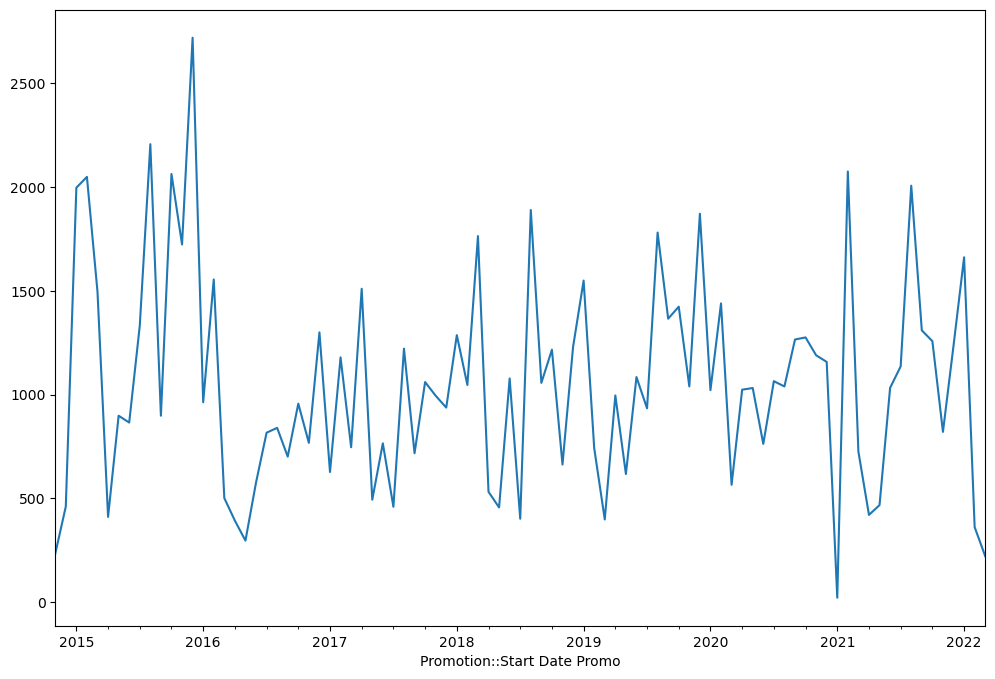

In [18]:
no_zeroMS['Final Quantity'].plot(figsize=(12,8))

# Check for Seaonal decomposition

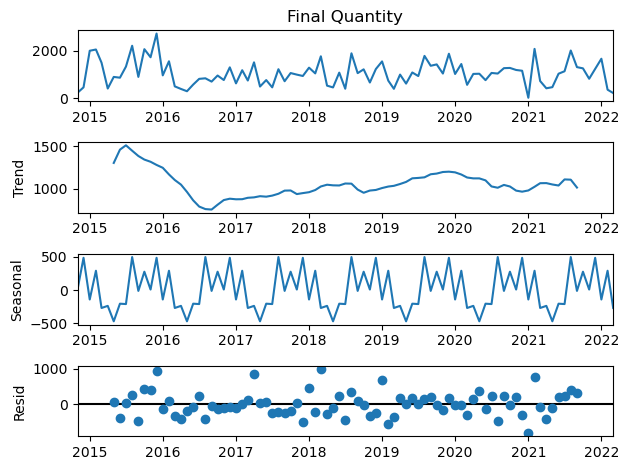

In [19]:
result=seasonal_decompose(no_zeroMS['Final Quantity'],model='add')
result.plot();

### Clearly a strong pattern of seasonalit, so lets use a SARIMA model.

In [20]:
# plotting
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

# stats
from statsmodels.api import tsa # time series analysis
import statsmodels.api as sm
import plotly.express as px

In [21]:
fig = px.line(no_zeroMS, x=no_zeroMS.index, y="Final Quantity",)
fig.update_layout(
    yaxis_title="Final Qty", 
    xaxis_title="Year",
    legend_title="", 
    title="Final Qty 2015 to 2022"
)
fig.show()

### Run auto_arima to get the fit for SARIMA in this case it finds it to be(3,0,0)

In [22]:
auto_arima(skudata_interpolatedMS['Final Quantity'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   96
Model:               SARIMAX(3, 0, 0)   Log Likelihood                -735.145
Date:                Sun, 25 Jun 2023   AIC                           1480.289
Time:                        07:08:29   BIC                           1493.111
Sample:                    11-01-2014   HQIC                          1485.472
                         - 10-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    491.6129    133.669      3.678      0.000     229.626     753.600
ar.L1          0.2971      0.085      3.510      0.000       0.131       0.463
ar.L2          0.3364      0.092      3.650      0.000       0.156       0.517
ar.L3         -0.1533      0.100     -1.539      0.124      -0.349       0.042
sigma2      2.441e+05   3.51e+04      6.963      0.000    1.75e+05    3.13e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.51
Prob(Q):                              0.97   Prob(JB):                         0.17
Heteroskedasticity (H):               0.90   Skew:                             0.47
Prob(H) (two-sided):                  0.78   Kurtosis:                         3.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
len(skudata_interpolatedMS)

96

# Set Train/ Test

In [24]:
train=skudata_interpolatedMS.iloc[:70]

In [25]:
test=skudata_interpolatedMS.iloc[70:]

In [26]:
# Fit for SARIMA model using the score above (3,0,0)

model = SARIMAX(train["Final Quantity"],order=(3,0,0))

In [27]:
result = model.fit()

In [28]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         Final Quantity   No. Observations:                   70
Model:               SARIMAX(3, 0, 0)   Log Likelihood                -540.357
Date:                Sun, 25 Jun 2023   AIC                           1088.714
Time:                        07:08:30   BIC                           1097.708
Sample:                    11-01-2014   HQIC                          1092.286
                         - 08-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4484      0.110      4.091      0.000       0.234       0.663
ar.L2          0.5409      0.124      4.360      0.000       0.298       0.784
ar.L3         -0.0794      0.132     -0.600      0.549      -0.339       0.180
sigma2      2.893e+05   4.53e+04      6.384      0.000    2.01e+05    3.78e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.77
Prob(Q):                              0.87   Prob(JB):                         0.68
Heteroskedasticity (H):               0.35   Skew:                             0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Get predicted values

In [29]:
start = len(train)

In [30]:
end = len(train) + len(test) - 1

In [31]:
predictions = result.predict(start,end,typ='levels').rename('SARIMA Predictions')

<AxesSubplot: xlabel='Promotion::Start Date Promo'>

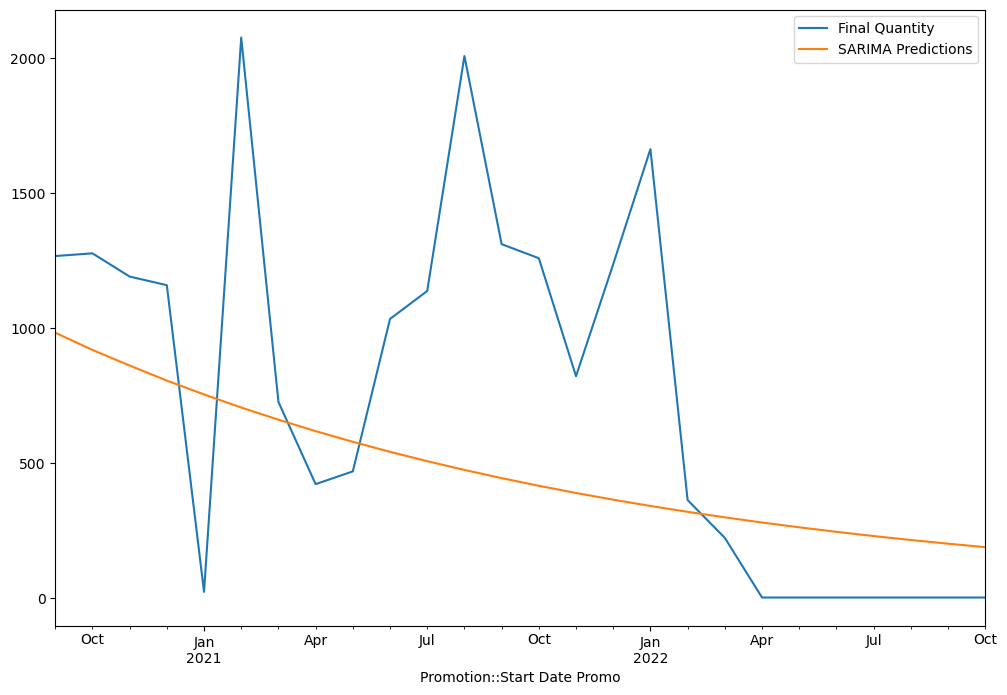

In [32]:
test["Final Quantity"].plot(legend=True,figsize=(12,8))
predictions.plot(legend=True)

## Great it runs a forecast. However to score it, it is best to look at the rmse (root mean squared error) vs the mean of the target value "Final Qty"

In [33]:
from statsmodels.tools.eval_measures import rmse

In [34]:
error = rmse(test["Final Quantity"],predictions)

In [35]:
error

633.7591070322784

In [36]:
test["Final Quantity"].mean()

755.0384615384615

## Typically, scoring below your mean is a good start. (633.7 vs 755.0)

# However, I beleive we can do better so lets add in X to make it sarimaX ; which introduces and exogenous varible into the model.

# Essentially, this means another value from our dataset into the model.

### Adding "Promotion::Promo_Value" to the model

In [37]:
auto_arima(skudata_interpolatedMS['Final Quantity'],exogenous=skudata_interpolatedMS[['Promotion::Promo_Value']],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   96
Model:               SARIMAX(3, 0, 0)   Log Likelihood                -735.145
Date:                Sun, 25 Jun 2023   AIC                           1480.289
Time:                        07:08:33   BIC                           1493.111
Sample:                    11-01-2014   HQIC                          1485.472
                         - 10-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    491.6129    133.669      3.678      0.000     229.626     753.600
ar.L1          0.2971      0.085      3.510      0.000       0.131       0.463
ar.L2          0.3364      0.092      3.650      0.000       0.156       0.517
ar.L3         -0.1533      0.100     -1.539      0.124      -0.349       0.042
sigma2      2.441e+05   3.51e+04      6.963      0.000    1.75e+05    3.13e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.51
Prob(Q):                              0.97   Prob(JB):                         0.17
Heteroskedasticity (H):               0.90   Skew:                             0.47
Prob(H) (two-sided):                  0.78   Kurtosis:                         3.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Train our SARIMAX

In [38]:
model = SARIMAX(train['Final Quantity'],exog=train[['Promotion::Promo_Value']],order=(3,0,0),enforce_invertibility=False)

In [39]:
result =model.fit()

In [40]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         Final Quantity   No. Observations:                   70
Model:               SARIMAX(3, 0, 0)   Log Likelihood                -534.586
Date:                Sun, 25 Jun 2023   AIC                           1079.171
Time:                        07:08:34   BIC                           1090.414
Sample:                    11-01-2014   HQIC                          1083.637
                         - 08-01-2020                                         
Covariance Type:                  opg                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Promotion::Promo_Value     1.9267      0.232      8.313      0.000       1.472       2.381
ar.L1                      0.4068      0.107      3.805      0.000       0.197       0.616
ar.L2                      0.3271      0.127      2.576      0.010       0.078       0.576
ar.L3                     -0.2004      0.122     -1.640      0.101      -0.440       0.039
sigma2                  2.498e+05   4.04e+04      6.189      0.000    1.71e+05    3.29e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.09
Prob(Q):                              0.97   Prob(JB):                         0.21
Heteroskedasticity (H):               0.62   Skew:                             0.51
Prob(H) (two-sided):                  0.26   Kurtosis:                         3.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
start = len(train)
end = len(train) + len(test) - 1

In [42]:
predictions = result.predict(start,end,exog=test[['Promotion::Promo_Value']]).rename('SARIMAX with Exog')

<AxesSubplot: xlabel='Promotion::Start Date Promo'>

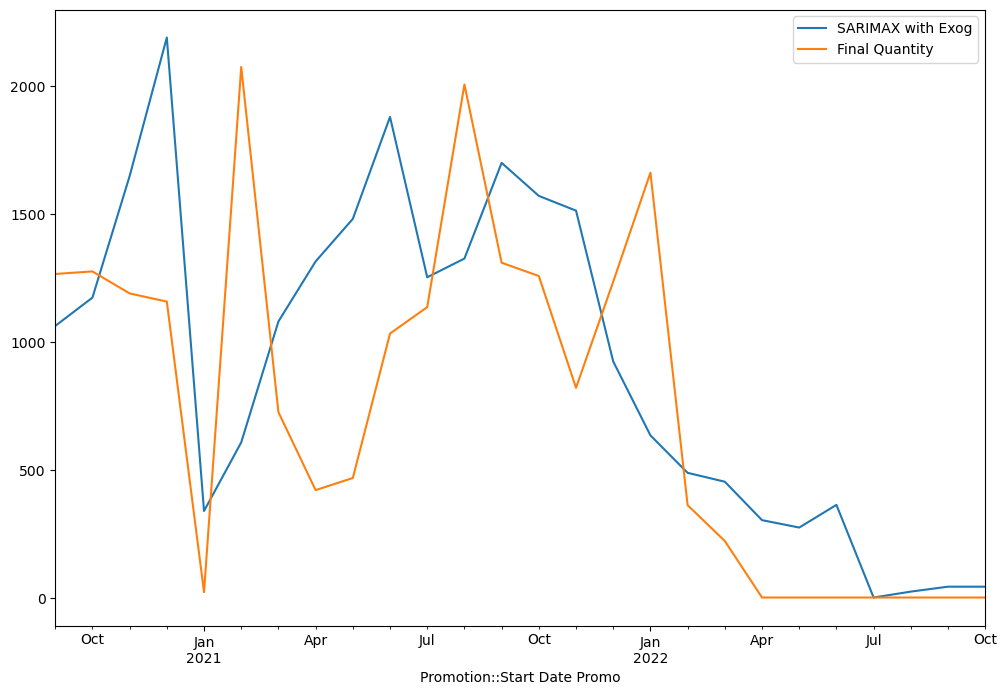

In [43]:
predictions.plot(figsize=(12,8),legend=True)
test['Final Quantity'].plot(legend=True)

In [44]:
rmse(test["Final Quantity"],predictions)

587.8002307741417

## Great our rmse performs better, and we can see visually that our model looks better compared to the actual result.

# Lets run the full SARIMAX model into the unknown future.

In [45]:
model = SARIMAX(skudata_interpolatedMS['Final Quantity'],exog=skudata_interpolatedMS[['Promotion::Promo_Value']],order=(3,0,0),enforce_invertibility=False)

In [46]:
results = model.fit()

In [47]:
exog_forecast = skudata_interpolatedMS[29:][["Promotion::Promo_Value"]]

In [48]:
fcast = result.predict(len(skudata_interpolatedMS),len(skudata_interpolatedMS)+40,exog=exog_forecast).rename("FINAL SARIMAX FORECAST")

<AxesSubplot: xlabel='Promotion::Start Date Promo'>

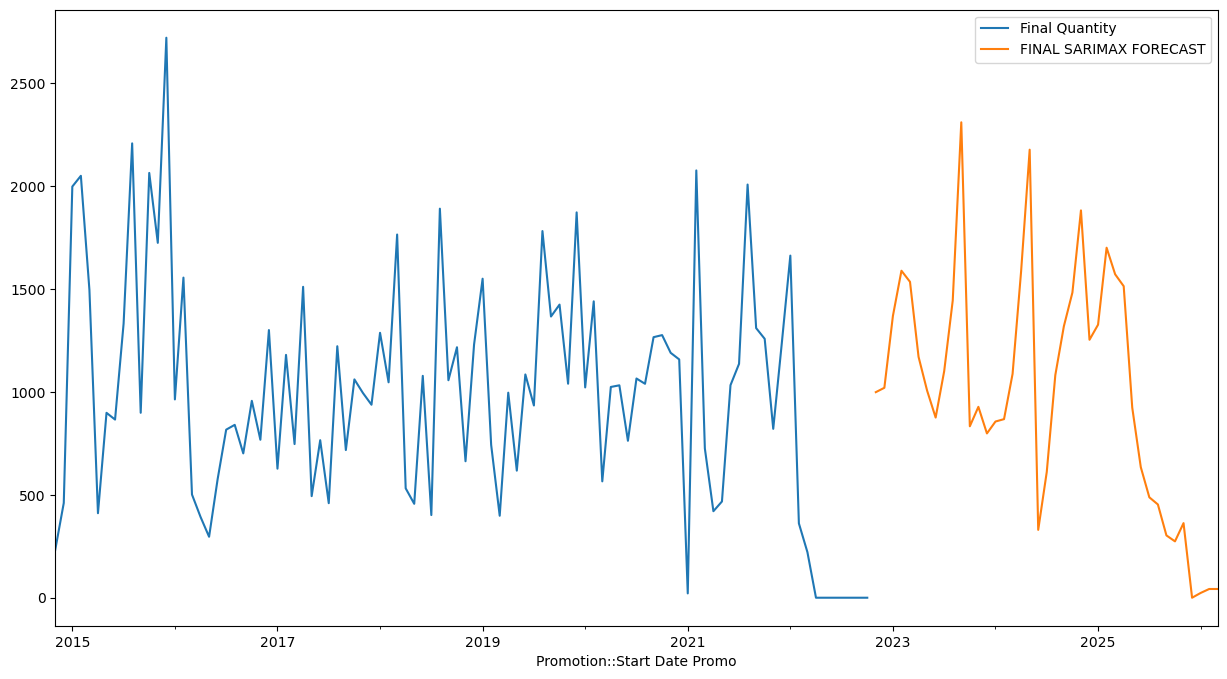

In [49]:
skudata_interpolatedMS['Final Quantity'].plot(figsize=(15,8),legend=True)
fcast.plot(legend=True)

# Great it runs into the future.

# However, I still can't explain if selling at a higher price point is actually effective. Given "Promotional Value" has no statistical relavance.

## Therefore lets look at Linear price response function, Price elasticy, & Maximum profit

In [50]:
skudata_interpolated

,Account Factors::Profit Center,Promo ID,Pricing::Segment,Pricing::Engine,Promotion::SKU,Promotion::End Date Promo,Pricing::Street,Promotion::Promo_Value,Promotion::Promo Type,Promotion::Promo_Net Price Point,...,Sell Through Estimate POS,Sell Through Estimate Inv,Final Quantity,Sell Through Estimate,SOP_Period,SOP_Half,SOP_Quarter,Usage ID,Account Factors::SAP Account,Promotion::LevelType
Promotion::Start Date Promo,,,,,,,,,,,,,,,,,,,,,
2014-12-01,1010,6894,zzz,123,TP1,12/31/2014,459.99,7.0,2,452.99,...,371.0,62.000000,62.0,160.0,209,H2,Q3,23747.0,2,2
2014-12-01,1010,6894,zzz,123,TP1,12/31/2014,459.99,7.0,2,452.99,...,276.0,182.333333,0.0,0.0,209,H2,Q3,23749.0,1,1
2015-01-01,1080,6895,zzz,123,TP1,1/31/2015,459.99,30.0,1,429.99,...,181.0,302.666667,0.0,0.0,210,H2,Q1,23750.0,3,3
2015-01-01,1010,6895,zzz,123,TP1,1/31/2015,459.99,30.0,1,429.99,...,86.0,423.000000,423.0,160.0,210,H2,Q1,23751.0,2,2
2015-01-01,1010,6895,zzz,123,TP1,1/31/2015,459.99,30.0,1,429.99,...,69.5,390.000000,0.0,0.0,210,H2,Q1,23752.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-01,1010,108237,zzz,123,TP1,6/30/2022,79.99,10.0,1,69.99,...,0.0,0.000000,0.0,914.0,203,H1,Q1,205610.0,1,1
2022-08-01,1010,108686,zzz,123,TP1,8/31/2022,79.99,12.0,1,67.99,...,0.0,61.000000,0.0,0.0,205,H1,Q2,206024.0,4,4
2022-09-01,1010,108714,zzz,123,TP1,9/30/2022,79.99,22.0,1,57.99,...,0.0,122.000000,0.0,0.0,206,H1,Q2,206028.0,4,4


In [51]:
skudata_interpolated['Promotion::Promo_Net Price Point'].unique()

array([452.99, 429.99, 424.99,  39.99,  49.99,  59.99,  54.99,  66.99,
        52.99,  42.99,  76.1 ,  46.99,  44.99,  56.99,  35.99,  25.99,
        57.99,  50.99,  43.99,  58.99,  33.99,  72.99,  63.99,  62.99,
        61.99,  78.99,  45.99,  64.99,  71.99,  69.99,  67.99])

In [52]:
net_pp = skudata_interpolated.loc[skudata_interpolated['Promotion::Promo_Net Price Point'] < 70.00, 'Promotion::Promo_Net Price Point']

In [53]:
len(net_pp)

1492

In [54]:
filtered_prices = skudata_interpolated.loc[skudata_interpolated['Promotion::Promo_Net Price Point'] < 70.00, 'Promotion::Promo_Net Price Point']
final_quantity = skudata_interpolated.loc[skudata_interpolated['Promotion::Promo_Net Price Point'].isin(filtered_prices), 'Final Quantity']
print(final_quantity)


Promotion::Start Date Promo
2015-05-01      5.0
2015-05-01     57.0
2015-05-01      0.0
2015-05-01      5.0
2015-05-01     14.0
              ...  
2022-06-01      0.0
2022-08-01      0.0
2022-09-01      0.0
2022-10-01      0.0
2022-01-01    244.0
Name: Final Quantity, Length: 1492, dtype: float64


In [55]:
len(final_quantity)

1492

In [56]:
skudata_interpolated['Final Quantity']

Promotion::Start Date Promo
2014-12-01     62.0
2014-12-01      0.0
2015-01-01      0.0
2015-01-01    423.0
2015-01-01      0.0
              ...  
2022-06-01      0.0
2022-08-01      0.0
2022-09-01      0.0
2022-10-01      0.0
2022-01-01    244.0
Name: Final Quantity, Length: 1552, dtype: float64

In [57]:
from sklearn.linear_model import LinearRegression
import inventorize as inv

In [58]:
price = net_pp
demand = final_quantity

In [59]:
pricing_df = pd.DataFrame({'price':price,'demand': demand})

In [60]:
model=LinearRegression()

model.fit(pricing_df[['price']],pricing_df[['demand']])

model.intercept_
model.coef_

array([[-2.58348154]])

In [61]:
prod_cost = 29.99

### Lets make a simulation

In [62]:
sim_data = pd.DataFrame({'price': range(1,90)})

sim_data['expected_demand'] = model.intercept_[0]+model.coef_[0]*sim_data['price']



In [63]:
# Check sim_data

sim_data

,price,expected_demand
0,1,188.920682
1,2,186.337200
2,3,183.753719
3,4,181.170237
4,5,178.586756
...,...,...
84,85,-28.091768
85,86,-30.675249
86,87,-33.258731
87,88,-35.842212


In [64]:
sim_data['total_cost'] = sim_data['expected_demand']*prod_cost
sim_data['revenue'] = sim_data['expected_demand']*sim_data['price']
sim_data['profit'] = sim_data['revenue']-sim_data['total_cost']

In [65]:
sim_data[sim_data.profit==max(sim_data.profit)]

,price,expected_demand,total_cost,revenue,profit
51,52,57.163123,1714.322062,2972.482402,1258.16034


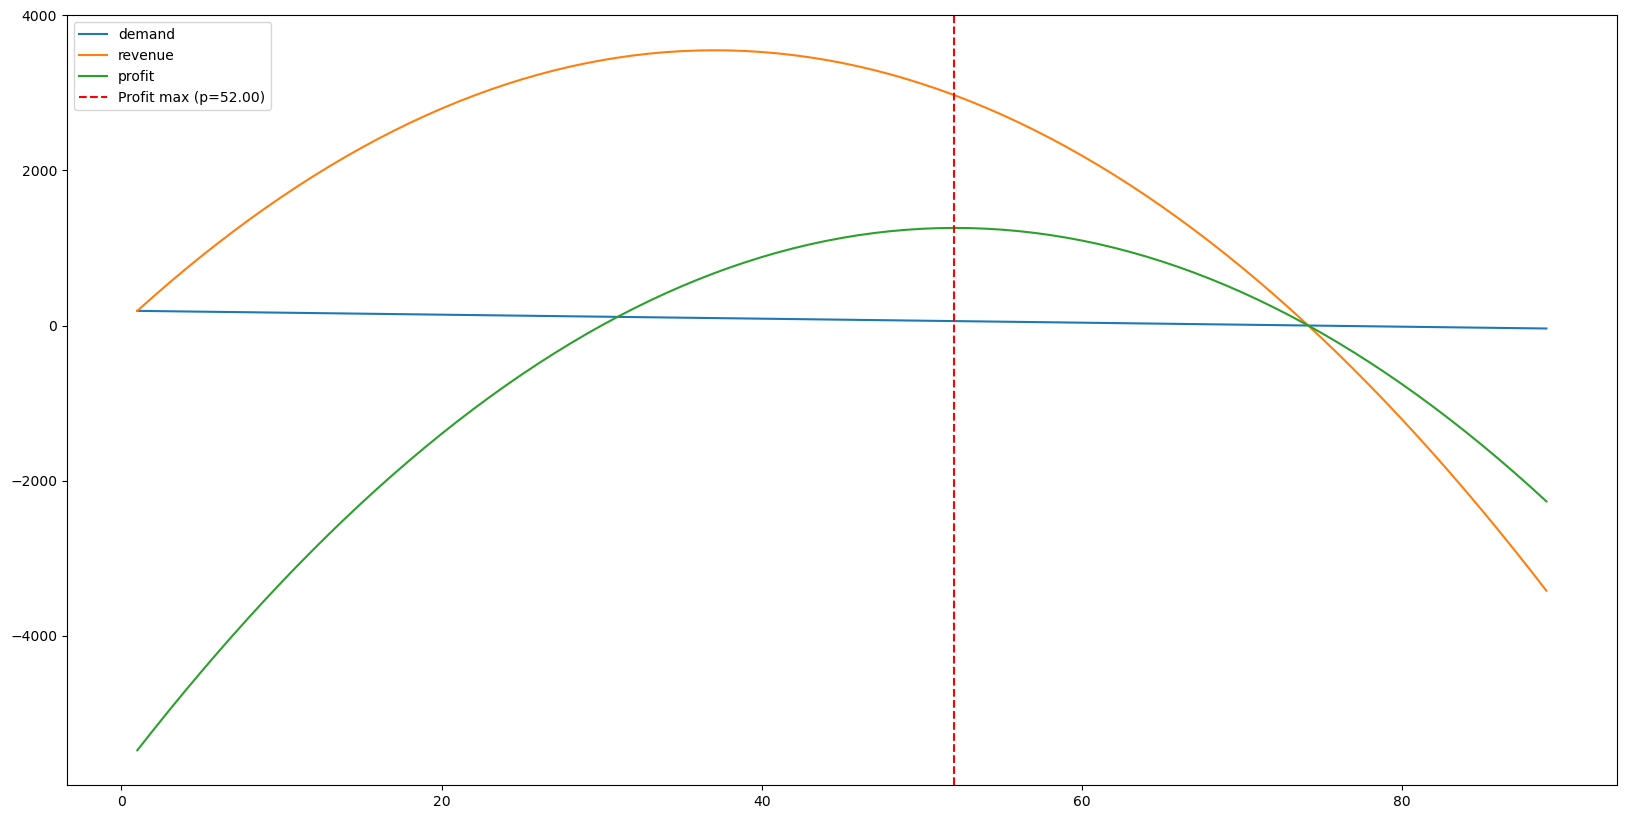

In [66]:
plt.figure(figsize=(20, 10))

plt.plot(sim_data.price, sim_data.expected_demand, label='demand')
plt.plot(sim_data.price, sim_data.revenue, label='revenue')
plt.plot(sim_data.price, sim_data.profit, label='profit')
plt.axvline(x=52, color='red', linestyle='--', label='Profit max (p=52.00)')  # Add vertical line at x=52
plt.legend(loc='upper left')

plt.show()

# Great now I think we have a better framework to understand if we our selling price is at an ideal leave, rather then over spend and achieving deminishing returns.

## In conclusion, there are many ways to predict a forecast and I believe I can continue to explore multiple avenues to optimize the prediction. This framework will help product managers to understand potential future sales. However, I believe by implementing this method of looking at price elasticity of demand; product managers will have a better understanding of overspending and get a better understanding of spend effectiveness; as well as, profit maximization. 